## Plot DUACS SSH data for Aviso region

Start by using the subsetted real-time product on the S-MODE server.

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import cartopy.crs as ccrs                   # import projections
import cartopy
import gsw
# import cftime


In [2]:
%matplotlib inline  
plt.rcParams['figure.figsize'] = (5,4)
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 400
plt.close('all')

__figdir__ = '../plots/' + 'SMODE_'
savefig_args = {'bbox_inches':'tight', 'pad_inches':0.2}
plotfiletype='png'

In [3]:
savefig = True
zoom = True
if zoom:
    xmin, xmax = (-126,-121)
    ymin, ymax = (36.25,38.5)
    levels = np.linspace(-.2,.2,41)
else:
    xmin, xmax = (-127,-121)
    ymin, ymax = (35, 40)
    levels = np.linspace(13,18,11)

    

In [4]:
def plot_ops_area(ax,**kwargs):
    """ Add polygon to show S-MODE pilot operations area
         Inputs
            - matplotlib.pyplot.plot kwargs

         return
            - exit code (True if OK)

    """

    # Add S-MODE pilot operations area
    ''' 

    New corners of pentagon:
    38° 05.500’ N, 125° 22.067’ W
    37° 43.000’ N, 124° 00.067’ W
    37° 45.000’ N, 123° 26.000‘ W
    36° 58.000’ N, 122° 57.000’ W
    36° 20.000’ N, 124° 19.067’ W 
    '''
    
    coord = [[-(125+22.067/60),38+5.5/60], [-(124+0.067/60),37+43/60], [-(123+26/60),37+45/60], [-(122+57/60),36+58/60], [-(124+19.067/60),36+20/60]]
    coord.append(coord[0]) #repeat the first point to create a 'closed loop'

    xs, ys = zip(*coord) #create lists of x and y values

    if ax is None:
        ax = plt.gca()    
    # ax.plot(xs,ys,transform=ccrs.PlateCarree()) 
    ax.plot(xs,ys,**kwargs) 
    
    SF_lon=-(122+25/60)
    SF_lat= 37+47/60
    
    # mark a known place to help us geo-locate ourselves
    ax.plot(SF_lon, SF_lat, 'o', markersize=3, **kwargs)
    ax.text(SF_lon-5/60, SF_lat+5/60, 'San Francisco', fontsize=8, **kwargs)
    ax.text(np.mean(xs)-.6, np.mean(ys)-.3, 'S-MODE ops area', fontsize=8, **kwargs)
    print(kwargs)
    
    return(xs,ys,ax)


In [16]:
url = 'http://smode.whoi.edu:8080/thredds/dodsC/satellite/AVISO/aviso.nc'
#url = 'https://my.cmems-du.eu/thredds/dodsC/cmems_obs-sl_glo_phy-ssh_my_allsat-l4-duacs-0.25deg_P1D'
ds = xr.open_dataset(url)

In [17]:
ds

<xarray.Dataset>
Dimensions:    (latitude: 21, longitude: 40, time: 39)
Coordinates:
  * time       (time) datetime64[ns] 2021-10-01 2021-10-02 ... 2021-11-08
  * latitude   (latitude) float32 34.12 34.38 34.62 34.88 ... 38.62 38.88 39.12
  * longitude  (longitude) float32 -129.9 -129.6 -129.4 ... -120.6 -120.4 -120.1
Data variables:
    adt        (time, latitude, longitude) float64 ...
    ugos       (time, latitude, longitude) float64 ...
    vgos       (time, latitude, longitude) float64 ...
    vgosa      (time, latitude, longitude) float64 ...
    err        (time, latitude, longitude) float64 ...
    err_vgosa  (time, latitude, longitude) float64 ...
    err_ugosa  (time, latitude, longitude) float64 ...
    sla        (time, latitude, longitude) float64 ...
    ugosa      (time, latitude, longitude) float64 ...
Attributes:
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    creator_name:                    CMEMS - Sea Level Thematic Assembly Center
    creator_url:                     http://marine.copernicus.eu
    date_created:                    2021-11-07T23:48:07Z
    date_issued:                     2021-11-07T23:48:07Z
    date_modified:                   2021-11-07T23:48:07Z
    geospatial_lat_max:              39.125
    geospatial_lat_min:              34.125
    geospatial_lat_resolution:       0.25
    geospatial_lat_units:            degrees_north
    geospatial_lon_max:              -120.125
    geospatial_lon_min:              -129.875
    geospatial_lon_resolution:       0.25
    geospatial_lon_units:            degrees_east
    geospatial_vertical_max:         0.0
    geospatial_vertical_min:         0.0
    geospatial_vertical_positive:    down
    geospatial_vertical_resolution:  point
    geospatial_vertical_units:       m
    history:                         2021-11-07 23:48:08Z: Creation
    institution:                     CLS, CNES
    keywords:                        Oceans > Ocean Topography > Sea Surface ...
    keywords_vocabulary:             NetCDF COARDS Climate and Forecast Stand...
    license:                         http://marine.copernicus.eu/web/27-servi...
    platform:                        Altika, Cryosat-2 New Orbit, Haiyang-2B,...
    processing_level:                L4
    product_version:                 vMay2021
    project:                         COPERNICUS MARINE ENVIRONMENT MONITORING...
    references:                      http://marine.copernicus.eu
    software_version:                18.7.3_DUACS_DT2018_baseline
    source:                          Altimetry measurements
    ssalto_duacs_comment:            Jason-3 is the reference mission used fo...
    standard_name_vocabulary:        NetCDF Climate and Forecast (CF) Metadat...
    summary:                         SSALTO/DUACS Near-Real-Time Level-4 sea ...
    time_coverage_duration:          P1D
    time_coverage_end:               2021-11-08T12:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             2021-11-07T12:00:00Z
    title:                           NRT merged all satellites Global Ocean G...
    History:                         Translated to CF-1.0 Conventions by Netc...

C:\Users\jtomf\anaconda3\envs\base2\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
<ipython-input-11-d4938d78390c>:21: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(cs,fraction = 0.022,extend='both')
C:\Users\jtomf\anaconda3\envs\base2\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


{'transform': <cartopy.crs.PlateCarree object at 0x000001EFA8BCC3B0>, 'color': 'w'}


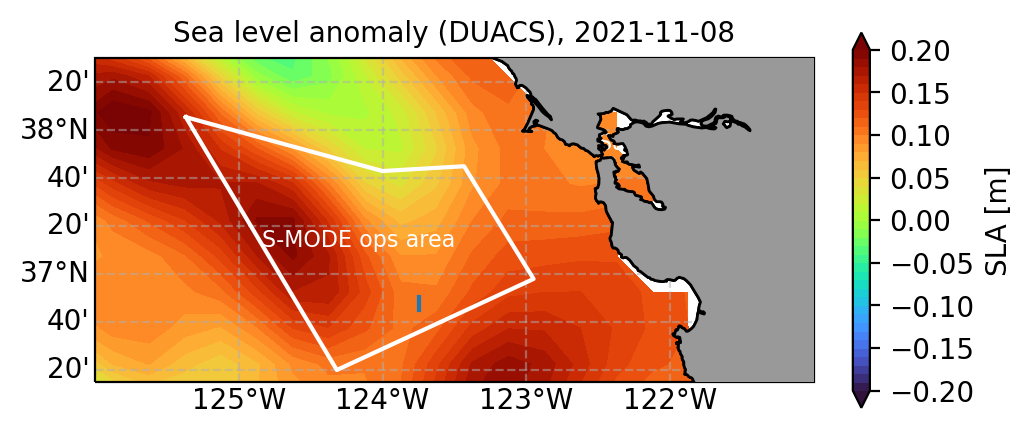

In [11]:
fig = plt.figure()
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude=200))  # Orthographic
extent = [xmin, xmax, ymin, ymax]
tind=-1
day_str = np.datetime_as_string(ds.time[tind], unit='D')
ax.set_extent(extent, crs=ccrs.PlateCarree())
ax.set_title('Sea level anomaly (DUACS), '+ day_str,size = 10.)

#plt.set_cmap(cmap=plt.get_cmap('nipy_spectral'))
plt.set_cmap(cmap=plt.get_cmap('turbo'))
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, linestyle='--')
gl.top_labels = False
gl.ylabels_right = False
#gl.xlocator = matplotlib.ticker.MaxNLocator(10)
#gl.xlocator = matplotlib.ticker.AutoLocator
# gl.xlocator = matplotlib.ticker.FixedLocator(np.arange(0, 360 ,30))

cs = ax.contourf(ds.longitude,ds.latitude,np.squeeze(ds.sla.isel(time=tind)), levels, extend='both', transform=ccrs.PlateCarree())
# cs = ax.pcolormesh(ds.longitude,ds.latitude,np.squeeze(ds.sla), vmin=levels[0], vmax=levels[-1], transform=ccrs.PlateCarree())
# cb = plt.colorbar(cs,ax=ax,shrink=.8,pad=.05)
cb = plt.colorbar(cs,fraction = 0.022,extend='both')
cb.set_label('SLA [m]',fontsize = 10)
ax.coastlines()
ax.add_feature(cartopy.feature.LAND, zorder=3, facecolor=[.6,.6,.6], edgecolor='black')

plot_ops_area(ax,transform=ccrs.PlateCarree(),color='w')

# Add a 10 km scale bar
km_per_deg_lat=gsw.geostrophy.distance((125,125), (37,38))/1000
deg_lat_equal_10km=10/km_per_deg_lat
ax.plot(-123.75+np.asarray([0, 0]),36.75+np.asarray([0.,deg_lat_equal_10km]),transform=ccrs.PlateCarree())

if savefig:
    plt.savefig(__figdir__+'_SLA'+plotfiletype,**savefig_args)


In [10]:
pwd

'C:\\Users\\jtomf\\Documents\\Python\\satellite_python_2022\\notebooks'